#Графы

**Граф** ($G(V, E)$) - математичекая модель представления системы объектов, обладающих парными связями. Представляет собой совокупность двух множеств: множества объектов (вершин $V$) и множества связей между объектами (ребер $E$).

Теория графов применяется в самых разных областях технических наук. В анализе данных к известным задачам, решаемыми алгоритмами теории графов, относятся:


*   анализ соцсетей
*   анализ структуры текста

В общем случае при помощи графов можно визуализировать любую систему объектов, попарно связанных между собой.


## Некоторые определения



*   **Порядок** - количество вершин графа.
*   **Размер** - количество ребер графа.
*   **Смежные вершины** - две вершины, соединенные одним ребром.
*   **Смежные ребра** - ребра, инцидентные одной вершине.
*   **Степень вершины** - количество инцидентных вершине ребер (т.е. сколько ребер связано с вершиной).
*   **Изолированная вершина** - вершина, не связанная ни с одним ребром.
*   **Висячая вершина** - вершина всего с одним ребром.
*   **Псевдограф** - граф, имеющий петли.
*   **Мультиграф** - граф с кратными ребрами (кратные ребра - те, у которых обе концевые вершины совпадают).
*   **Ориентированный граф** - имеет дуги вместо ребер, одна из двух концевых вершин является начальной, вторая - конечной.
*   **Связный граф** - граф, в котором есть путь для любых двух вершин.



Популярной задачей при построении графа является **выделение центральных вершин**. Подходов к определению центральности вершины существует несколько:


*   Центральность по посредничеству (Betweenness centrality) - показывает, через какие вершины проходит наибольшее количество кратчайших путей
*   Центральность по собственному вектору (Eigenvector centrality) - показывает, насколько тесно связана вершина с другими вершинами, определяет централизацию всей структуры графа по собственным векторам
*   Центральность по степени (Degree centrality) - показывает, сколько ребер исходит из вершины


Другой популярной задачей является поиск сообществ на графе. **Сообщество на графе** - группа вершин, которые теснее связаны между собой, чем с остальным графом. Выделение сообществ является задачей кластеризации. Качество разбиения на сообщества обычно оценивается по **модулярности** - скалярной величине из отрезка $[-1;1]$, которая показывает, насколько при заданном разбиении на сообщества плотность связей внутри сообщества больше плотности связей между сообществами.



##networkx

`networkx` - это модуль для построения и анализа графов. Подробно с библиотекой можно ознакомиться в [документации](https://networkx.org/documentation/stable//index.html).


Для начала посмотрим простой пример построения графа близких по смыслу слов (степень семантической близости получена при помощи **word2vec**).

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
sims = [('хищник', 0.3991128206253052),
        ('мурена', 0.38718169927597046),
        ('бегемот', 0.3844783306121826),
        ('бизон', 0.38189974427223206),
        ('крокодил', 0.3761039972305298)] # топ-5 похожих слов для слова "аллигатор"
sims

[('хищник', 0.3991128206253052),
 ('мурена', 0.38718169927597046),
 ('бегемот', 0.3844783306121826),
 ('бизон', 0.38189974427223206),
 ('крокодил', 0.3761039972305298)]

In [ ]:
G = nx.Graph()
edges = [("аллигатор", sim[0]) for sim in sims]
edges

[('аллигатор', 'хищник'),
 ('аллигатор', 'мурена'),
 ('аллигатор', 'бегемот'),
 ('аллигатор', 'бизон'),
 ('аллигатор', 'крокодил')]

In [ ]:
G.add_edges_from(edges)

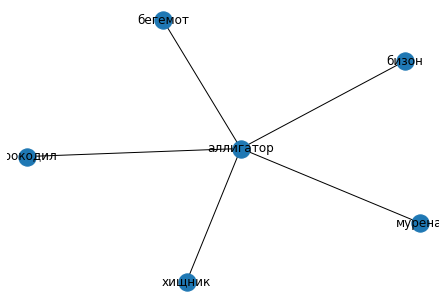

In [ ]:
nx.draw(G, with_labels=True)

Добавим веса на граф.

In [ ]:
G = nx.Graph()
edges = [("аллигатор", sim[0], round(sim[1], 3)) for sim in sims]
edges

[('аллигатор', 'хищник', 0.399),
 ('аллигатор', 'мурена', 0.387),
 ('аллигатор', 'бегемот', 0.384),
 ('аллигатор', 'бизон', 0.382),
 ('аллигатор', 'крокодил', 0.376)]

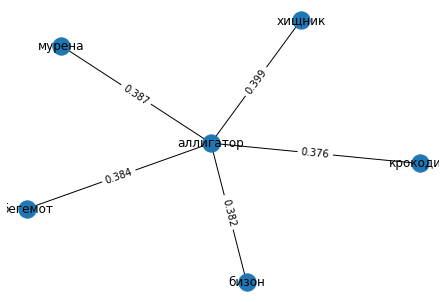

In [ ]:
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

И так видно, какая вершина является центральной, но все же можно ее выделить, построив эгоцентричный граф.

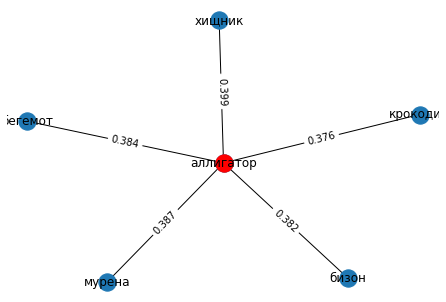

In [ ]:
ego_network = nx.ego_graph(G, "аллигатор")
pos = nx.spring_layout(ego_network)
nx.draw(ego_network, pos, with_labels=True)
nx.draw_networkx_edge_labels(ego_network, pos, edge_labels=labels)
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(ego_network, pos, nodelist=["аллигатор"], **options)
plt.show()

Принципиально виды графов различаются только типом структуры, которая в нем прослеживается. В остальном графы делятся на ориентированные и неориентированные.

Посмотрим пример визуализации ориентированного графа.


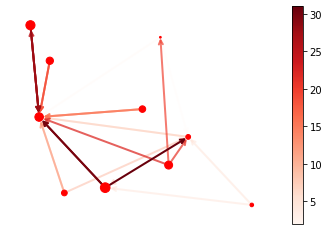

In [ ]:
import matplotlib as mpl

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5) # генерируем случайный ориентированный граф
pos = nx.layout.spring_layout(G) # задаем позиции вершин

node_sizes = [3 + 10 * i for i in range(len(G))] # считаем размер вершины в соответствии с величиной объекта
M = G.number_of_edges() # достаем количество ребер
edge_colors = range(2, M + 2) # задаем цвета вебрам
edge_alphas = [(5 + i) / (M + 4) for i in range(M)] # считаем важность ребра
# отрисовываем структуру графа
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="red")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Reds,
    width=2,
)
# привязываем коэффициент ребру
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

# визуализируем
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Reds)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

`networkx` визуализирует через `matplotlib`, следовательно, при необходимости можно нанести граф на одно поле с другим графиком: [пример](https://networkx.org/documentation/stable//auto_examples/drawing/plot_degree_histogram.html#sphx-glr-auto-examples-drawing-plot-degree-histogram-py).

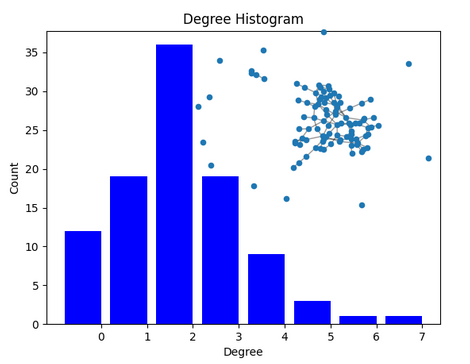

## Пример с визуализацией текстовых данных

Задача: визуализировать связи между ключевыми словами в 150К+ текстах, чтобы выявить предметные области.

1. Загружаем *.csv c ключевыми словами. [Данные](https://drive.google.com/file/d/1PP93tfLNGYxS-thP6P1rMQ9ltTRfHz3H/view?usp=sharing).

In [ ]:
import csv

words = []
with open('abs_keywords2018_2019.csv', 'r', encoding='utf-8') as fin:
    dr = csv.DictReader(fin)
    for row in dr:
        words.append(row["Keywords"])

list_of_kw = []
ks = []
for i in range(0, len(words) - 1):
    words[i] = words[i].lower()
    words[i] = words[i].split(',')
    for k in words[i]:
        ks.append(k.strip())
    list_of_kw.append(ks)
    ks = []

kwords = []
for i in range(0, len(list_of_kw)):
    for word in list_of_kw[i]:
        kwords.append((word, 'text' + str(i)))

print(kwords)

[('curricular structures', 'text0'), ('weaves', 'text0'), ('technical communication', 'text0'), ('economic downturns', 'text0'), ('open source software', 'text0'), ('implications', 'text0'), ('filter', 'text1'), ('unique snapshot dataset', 'text1'), ('content segments', 'text1'), ('information similarity', 'text1'), ('social media news', 'text1'), ('filter bubbles', 'text1'), ('news feed', 'text1'), ('empirical analysis', 'text1'), ('danish facebook users', 'text1'), ('sparql users', 'text2'), ('insight', 'text2'), ('users', 'text2'), ('sparql log', 'text2'), ('additional insight', 'text2'), ('queries', 'text2'), ('students', 'text3'), ('visual narratives', 'text3'), ('new classes', 'text4'), ('smart materials', 'text4'), ('ics materials', 'text4'), ('research centers', 'text4'), ('corpora', 'text5'), ('yake', 'text5'), ('multilingual keyword extraction', 'text5'), ('system', 'text5'), ('single documents', 'text5'), ('text feature', 'text6'), ('keyword extraction', 'text6'), ('unsuperv

2. Создаем таблицу уникальных ключевых слов.

In [ ]:
import sqlite3

con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE keywords (word, text_id);")

con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE keywords (word, text_id);")
cur.executemany("INSERT INTO keywords (word, text_id) "
                "VALUES (?, ?);",
                kwords)
con.commit()
sql1 = "SELECT word, " \
       "COUNT(word) AS cnt " \
       "FROM keywords " \
       "GROUP BY word " \
       "ORDER BY cnt " \
       "DESC;"
cur.execute(sql1)
to_print = cur.fetchall()
uniq_words = []
pairs = []
for row in to_print:
    uniq_words.append(row[0])

print("All keywords:", len(kwords))
print("Unique keywords:", len(uniq_words))

All keywords: 8028
Unique keywords: 6785


3. Для каждой уникальной пары ключевых слов определяем, сколько раз она встречается – задаем веса будущим ребрам.

In [ ]:
sql2 = "SELECT a.word a, b.word b, " \
       "COUNT(*) cnt " \
       "FROM keywords a " \
       "JOIN keywords b " \
       "ON b.text_id = a.text_id AND b.word > a.word " \
       "GROUP BY a.word, b.word " \
       "ORDER BY cnt " \
       "DESC;"
cur.execute(sql2)
occ = cur.fetchall()


weighted_pairs = []

for row in occ:
    weighted_pairs.append((row[0], row[1], row[2]))

for i in range(0,15):
  print(i, weighted_pairs[i])

0 ('collections', 'cultural heritage', 4)
1 ('cms experiment', 'protonproton collisions', 3)
2 ('cultural heritage', 'museums', 3)
3 ('humanities research', 'scholars', 3)
4 ('integrated luminosity', 'protonproton collisions', 3)
5 ('20th century', '20thcentury movies', 2)
6 ('20th century', '21st century', 2)
7 ('20th century', 'dystopia', 2)
8 ('20th century', 'metropolis', 2)
9 ('20th century', 'urban fear', 2)
10 ('20thcentury movies', 'dystopia', 2)
11 ('20thcentury movies', 'metropolis', 2)
12 ('20thcentury movies', 'urban fear', 2)
13 ('access', 'open access', 2)
14 ('adaptive environment', 'cultural heritage collections', 2)


4. Создаем граф и удаляем из него вершину digital humanities для чистоты эксперимента.

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(weighted_pairs)
G.remove_node("digital humanities")

nx.write_gexf(G, 'network2018_2019.gexf')

5. Считаем простейшие метрики на графе: количество вершин, ребер, плотность, определяем связность и диаметр графа.

In [ ]:
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
if nx.is_connected(G):
    print("Connectivity: True")
    print("Network diameter: ", nx.diameter(G))
else:
    print("Connectivity: False")

Name: 
Type: Graph
Number of nodes: 6777
Number of edges: 24016
Average degree:   7.0875
Network density: 0.0010459713465870656
Connectivity: False


6. Рассчитываем центральность по степени для вершин графа.
Степень – число ребер, инцидентных вершине. Для поиска вершин, имеющих наибольшее количество связей с другими вершинами.

In [ ]:
from operator import itemgetter

degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 15 nodes by degree:")
for d in sorted_degree[:15]:
    print(d)

Top 15 nodes by degree:
('social media', 114)
('cultural heritage', 111)
('analysis', 102)
('information', 85)
('corpus', 69)
('machine learning', 67)
('knowledge', 66)
('digital', 66)
('history', 65)
('collections', 61)
('research', 61)
('natural language processing', 59)
('evaluation', 58)
('content', 56)
('people', 51)


7. Рассчитываем центральность по собственному вектору для вершин графа. Центральность по собственному вектору (eigenvector centrality) – отношение числа ребер в графе к числу ребер в полном графе с тем же количеством вершин. Показывает, насколько тесно связаны между собой вершины графа.

In [ ]:
print("Calculating eigenvector centrality...")
eigenvector_dict = nx.eigenvector_centrality(G)
print("Eigenvector centrality...")
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
print("Sorting...")
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 15 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:15]:
    print(b)

Calculating eigenvector centrality...
Eigenvector centrality...
Sorting...
Top 15 nodes by eigenvector centrality:
('cultural heritage', 0.47825964498454027)
('collections', 0.18972371202296934)
('museums', 0.17509359655138096)
('people', 0.1738315638255236)
('representation', 0.13516226674792153)
('information', 0.12162879632537817)
('life cycle', 0.1155542560642351)
('imperial gates', 0.10518354078228051)
('painting materials', 0.10518354078228051)
('wooden church', 0.10518354078228051)
('wooden support', 0.10518354078228051)
('cultural objects', 0.10347004656954942)
('fundamental access points', 0.10347004656954942)
('italian mab', 0.10347004656954942)
('ontologies', 0.10347004656954942)


8. Рассчитываем центральность по посредничеству для вершин графа. Центральность по посредничеству (betweenness centrality) показывает, через какие вершины проходит наибольшее количество кратчайших путей.

In [ ]:
print("Calculating betweenness centrality...")
betweenness_dict = nx.betweenness_centrality(G, normalized=True)
print("Betweenness centrality...")
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
print("Sorting...")
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 15 nodes by betweenness centrality:")
for b in sorted_betweenness[:15]:
    print(b)

Calculating betweenness centrality...
Betweenness centrality...
Sorting...
Top 15 nodes by betweenness centrality:
('analysis', 0.05750589369783703)
('information', 0.05042463982276723)
('cultural heritage', 0.043668895399525995)
('digital', 0.0426265804248879)
('collections', 0.03868678091703223)
('social media', 0.038627083922048056)
('natural language processing', 0.031536236662118)
('data mining', 0.030970661398145524)
('machine learning', 0.028661766422852515)
('users', 0.027133229258586425)
('knowledge', 0.025692337947793374)
('corpus', 0.025438634001968677)
('history', 0.025346467211238885)
('project', 0.020392288568101265)
('web', 0.020116192099335843)


9. Делаем визуализацию графа.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0, flags=flags)


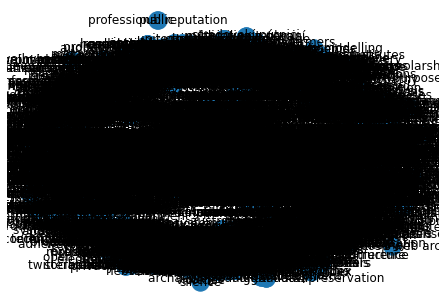

In [ ]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()

10. Определяем сообщества на графе по модулярности. Модулярность – скалярная величина из отрезка [-1, 1], которая показывает, насколько при заданном разбиении графа на сообщества плотность связей внутри сообществ больше плотности связей между сообществами.

In [ ]:
from community import community_louvain

communities = community_louvain.best_partition(G)
print("Modularity:", community_louvain.modularity(communities, G))

Modularity: 0.9347885441050892


10. Определяем наиболее крупные сообщества на графе.

In [ ]:
nx.set_node_attributes(G, communities, 'modularity')

modularity = {}
for k, v in communities.items():
    if v not in modularity:
        modularity[v] = [k]
    else:
        modularity[v].append(k)

for k, v in modularity.items():
    if len(v) > 19:
      print(str(k), len(v), v)

0 106 ['collections', 'lowcost immersive technologies', 'virtual museums', 'area', 'aesthetic abundance', 'alternative arrangements', 'conventional display', 'cultural artifacts', 'cultural collection', 'dynamic piles', 'grid', 'museum objects', 'numismatic collection', 'online interfaces', 'streamsthis research', 'african art collection', 'benjamin jenkins', 'keren darancette', 'kreeger museum', 'small liberal arts college', 'computational text analysis', 'digital humanitiesdigital humanities', 'inquiry', 'procedural methodologies', 'scholarship', 'sciences', 'scope', 'art historical photographic', 'cini foundation', 'new techniques', 'photographic archive', 'venicenumerous libraries', 'attribution', 'authorship', 'digitization', 'handwritten text recognition', 'multidisciplinary project', 'noisy digitized correspondence', 'uncorrected correspondence', 'wilhelm grimm', 'augmented gallery', 'automatic creation', 'online public repositories', 'user defined queries', 'european countries'

12. Визуализация графа подобластей по сообществам.

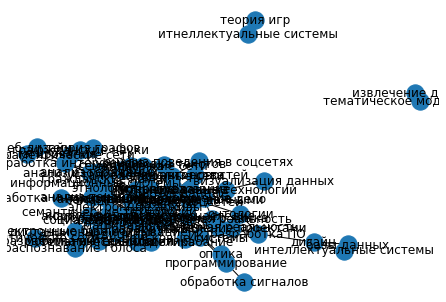

In [ ]:
Q = nx.Graph()
Q.add_edges_from([("анализ данных", "анализ музыки"),
                  ("анализ данных", "анализ текстов"),
                  ("анализ данных", "анализ геоданных"),
                  ("анализ данных", "этнология"),
                  ("анализ данных", "история"),
                  ("анализ текстов", "литература"),
                  ("литература", "установление авторства"),
                  ("установление авторства", "история"),
                  ("история", "кино"),
                  ("история", "социальные науки"),
                  ("история", "обработка естественного языка"),
                  ("история", "этнология"),
                  ("история", "образование"),
                  ("образование", "открытые данные"),
                  ("образование", "управление данными"),
                  ("образование", "библиотечное дело"),
                  ("открытые данные", "управление данными"),
                  ("открытые данные", "библиотечное дело"),
                  ("управление данными", "библиотечное дело"),
                  ("машинное обучение", "нейронные сети"),
                  ("нейронные сети", "анализ поведения в соцсетях"),
                  ("анализ поведения в соцсетях", "анализ новостей"),
                  ("машинное обучение", "анализ новостей"),
                  ("машинное обучение", "библиотечное дело"),
                  ("машинное обучение", "большие данные"),
                  ("большие данные", "анализ соцсетей"),
                  ("большие данные", "история"),
                  ("семантические сети", "семантические технологии"),
                  ("семантические сети", "открытые данные"),
                  ("саментические сети", "анализ геоданных"),
                  ("семантисечкие сети", "история"),
                  ("анализ геоданных", "история"),
                  ("история", "открытые данные"),
                  ("сементические сети", "электронные библиотеки"),
                  ("история", "культура"),
                  ("история", "информационные системы"),
                  ("анализ геоданных", "теория графов"),
                  ("анализ геоданных", "графжданские науки"),
                  ("гражданские науки", "история"),
                  ("гражданские науки","разработка интерфейсов"),
                  ("гражданские науки", "коллекции данных"),
                  ("разработка интерфейсов", "анализ геоданных"),
                  ("анализ геоданных", "коллекции данных"),
                  ("коллекции данных","управление данными"),
                  ("коллекции данных", "культурное наследие"),
                  ("управление данными", "онтологии"),
                  ("разработка интерфейсов", "анализ изображений"),
                  ("разработка интерфейсов", "системы тэгирования"),
                  ("разработка интерейсов", "социальные науки"),
                  ("разработка интферфейсов","анализ данных"),
                  ("разработка интерфейсов", "веб-дизайн"),
                  ("культурное наследие", "управление проектами"),
                  ("управление проектами", "разработка ПО"),
                  ("разработка ПО", "онтологии"),
                  ("разработка ПО", "ИКТ"),
                  ("ИКТ", "виртуальная реальность"),
                  ("литература", "оцифровка текстов"),
                  ("литература", "анализ текстов"),
                  ("ИКТ", "лингвистика"),
                  ("ИКТ", "обработка естественного языка"),
                  ("обработка естественного языка", "поисковые системы"),
                  ("обработка естественного языка", "машинное обучение"),
                  ("обработка естественного языка", "связанные данные"),
                  ("обработка естественного языка","перевод"),
                  ("связанные данные", "семантические технологии"),
                  ("связанные данные", "коллекции данных"),
                  ("коллекции данных", "корпусная лингвистика"),
                  ("корпусная лингвистика", "машинный перевод"),
                  ("обработка естественного языка", "машинный перевод"),
                  ("машинный перевод", "перевод"),
                  ("перевод", "история"),
                  ("медицина", "анализ текстов"),
                  ("анализ текстов","анализ соцсетей"),
                  ("анализ текстов", "линигвистика"),
                  ("лингвистика", "история"),
                  ("история", "анализ изображений"),
                  ("культурное наследие", "культура"),
                  ("культурное наследие", "анализ текстов"),
                  ("культурное наследие", "виртуальная реальность"),
                  ("культурное наследие", "дополненная реальность"),
                  ("дополненная реальность", "виртуальная реальность"),
                  ("лингвистика", "мобильные технологии"),
                  ("мобильные технологии", "распознавание голоса"),
                  ("лингвистика", "корпусная лингвистика"),
                  ("лингвистика", "электронные библиотеки"),
                  ("лингвистика", "машинное обучение"),
                  ("машинное обучение", "анализ текстов"),
                  ("ИКТ", "программирование"),
                  ("программирование", "обработка сигналов"),
                  ("ИКТ", "поисковые системы"),
                  ("ИКТ", "оптика"),
                  ("электронные архивы", "литература"),
                  ("электронные архивы", "коллекции данных"),
                  ("электронные архивы", "анализ данных"),
                  ("коллекции данных", "анализ тектстов"),
                  ("коллекции данных", "культурное наследие"),
                  ("Разработка ПО", "электронные архивы"),
                  ("разработка ПО", "дизайн"),
                  ("дизайн", "базы данных"),
                  ("дизайн","интеллектуальные системы"),
                  ("интеллектуальные системы", "базы данных"),
                  ("итнеллектуальные системы", "теория игр"),
                  ("цифровые технологии", "анализ соцсетей"),
                  ("образование", "цифровые технологии"),
                  ("цифровые технологии", "визуализация данных"),
                  ("цифровые технологии", "библиотечное дело"),
                  ("библиотечное дело", "виртуальная реальность"),
                  ("дистанционное считывание", "социальные науки"),
                  ("социальные науки", "история"),
                  ("социальные науки", "медицина"),
                  ("дистанционное считывание", "распознавание голоса"),
                  ("дистанционное считывание", "анализ текстов"),
                  ("дистанционное считывание", "анализ музыки"),
                  ("анализ музыки", "корпусная лингвистика"),
                  ("корпусная лингвистика", "анализ текстов"),
                  ("история", "машинное обучение"),
                  ("история", "экономика"),
                  ("история", "нейронные сети"),
                  ("нейронные сети", "машинное обучение"),
                  ("анализ текстов", "тематическое моделирвоание"),
                  ("тематическое моделирование", "извлечение данных")])

nx.draw(Q, with_labels=True)
plt.show()

nx.write_gexf(Q, 'subclusters.gexf')

Главный вывод: `networkx` хорош в двух случаях:


1.   визуализация графа небольшого порядка
2.   лэйблы вершин не представляют особой ценности



## Gephi

Если все же мы имеем дело с огромным графом, где важны все лэйблы вершин, то лучшим средством визуализации на текущий момент является [`Gephi`](https://gephi.org/).

ПО довольно давно разработано и в последние годы не обновляется, но тем не менее обладает достаточным аппаратом для нагляной визуализации графов любого размера. Также возможна кластеризация графа в режиме реального времени.

`Gephi` - декстопный, но free и кроссплатформенный.

Графы из предыдущего примера с помощью `Gephi` можно представить в следующем виде.

Эго-граф ключевых слов для вершины `Digital Humanities`.
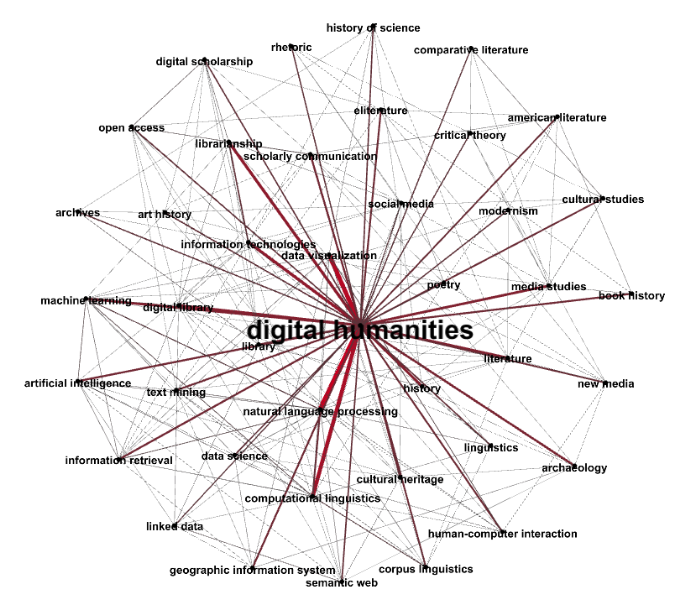

Граф ключевых слов без вершины `Digital Humanities`.
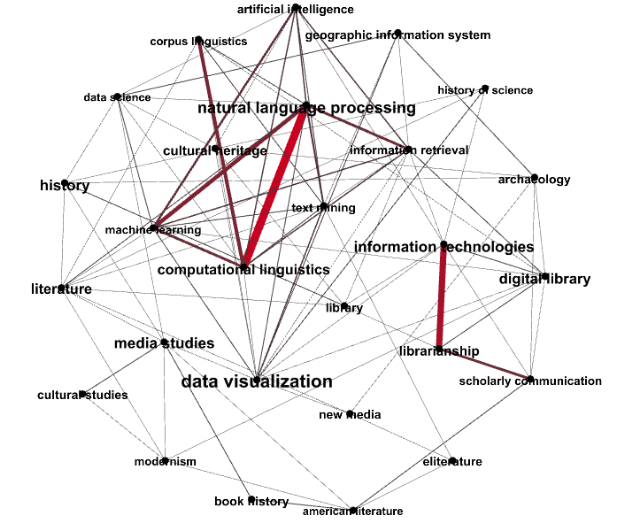

Пример визуализации одного кластера.
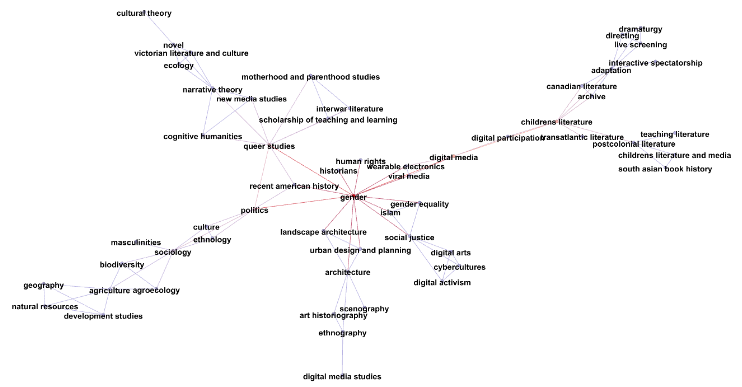

Граф подобластей `Digital Humanities`.
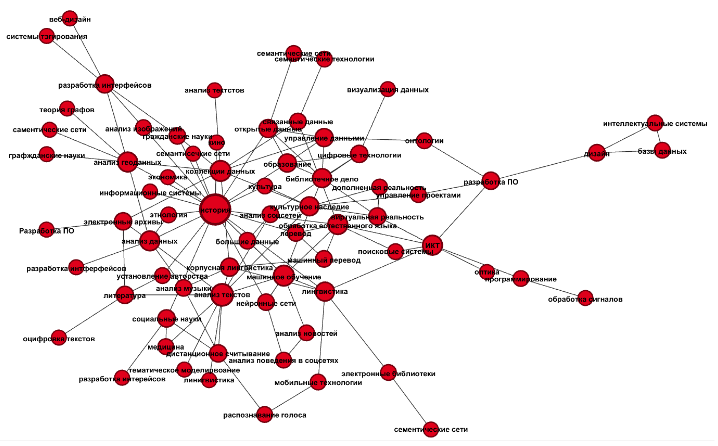

Есть еще прикольная штука для визуализации объемных текстов в виде графа - [News Graph](https://github.com/BrambleXu/news-graph).

# Карты

Картографическая визуализация - один из наиболее понятных человеческому глазу способ визуализации категориальных данных. Степень детализации карты зависит от того, есть ли в датасете координаты. Если есть - хорошо. Если нет - можно подтянуть координаты прямо из библиотеки.

Большинство библиотек как в Python, так и в других языках при вызуализации карт использует пакет `leaflet`. С ним можно работать напрямую, но можно воспользоваться и готовыми решениями.

Пример визуализации посмотрим в библиотеке plotly. Возьмем датасет про распределение Starbucks по территории Калифорнии. [Данные](https://github.com/ali-ce/datasets/blob/master/Starbucks/Starbucks%20in%20California%20-%20County%20Stats.csv).

In [ ]:
import pandas as pd

In [ ]:
cs = pd.read_csv("california_starbucks.csv")
cs.head()

,County,Number of Starbucks,Starbucks per million inhabitants,Starbucks per 10 sq. mile,Median Age,Median Household Income,2010 Population,Percentage of white population,Land Area (Sq. miles),Number of Starbucks (Rank),Starbucks per million inhabitants (Rank),Starbucks per sq. mile (Rank),Median Age (Rank),Median Household Income (Rank),Percentage of white population (Rank)
0,Siskiyou,1,22.0,0.002,47.0,"$37,865","44,900",85.0,6287.0,1,4.0,1.0,47.0,3.0,45.0
1,Inyo,2,108.0,0.002,45.6,"$49,571",18546,74.0,10203.0,8,49.0,2.0,46.0,20.0,34.0
2,Trinity,1,73.0,0.003,49.3,"$37,672",13786,87.0,3179.0,1,35.0,3.0,52.0,2.0,50.0
3,Mono,2,141.0,0.007,37.2,"$60,469",14202,82.0,3044.0,8,52.0,4.0,30.0,35.0,42.0
4,Lassen,3,86.0,0.007,37.1,"$52,484",34895,73.0,4557.0,12,43.0,5.0,28.0,23.0,32.0


In [ ]:
!pip install plotly==4.5 # геопозицию можно подтянуть только с этой версии

     |████████████████████████████████| 7.1MB 20.2MB/s 
  Found existing installation: plotly 4.14.3
    Uninstalling plotly-4.14.3:
      Successfully uninstalled plotly-4.14.3


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
counties["features"][0]["properties"]

{'CENSUSAREA': 594.436,
 'COUNTY': '001',
 'GEO_ID': '0500000US01001',
 'LSAD': 'County',
 'NAME': 'Autauga',
 'STATE': '01'}

In [ ]:
import plotly.express as px

fig = px.choropleth(cs, geojson=counties, locations='County', 
                    featureidkey="properties.NAME",
                    color='Number of Starbucks',
                           color_continuous_scale="tealrose",
                           range_color=(0, 200),
                           scope="usa",
                           labels={'number':'Number of Starbucks'},
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Как видим, для визуализации без координат нам нужно подтягивать дополнительно файлик `geojson` с необходимыми координатами. Такой файлик надо гуглить и изучать. Данные из plotly, например, хранятся по [ссылке](https://github.com/plotly/datasets).

## Exploratory

Неплохая штука для визуализации не только карт, но и других видов графиков - [Exploratory](httpshttps://exploratory.io/). Преимущественно платная, но студенты могут пользоваться бесплатной версией. В последнее время такж появилась версия public free.

Преимущества ПО: 
* можно подгрузить прямо через нее геоданные, построить график, а потом еще и выгрузить код на R
* автоматически формирует дашборды по талице данных

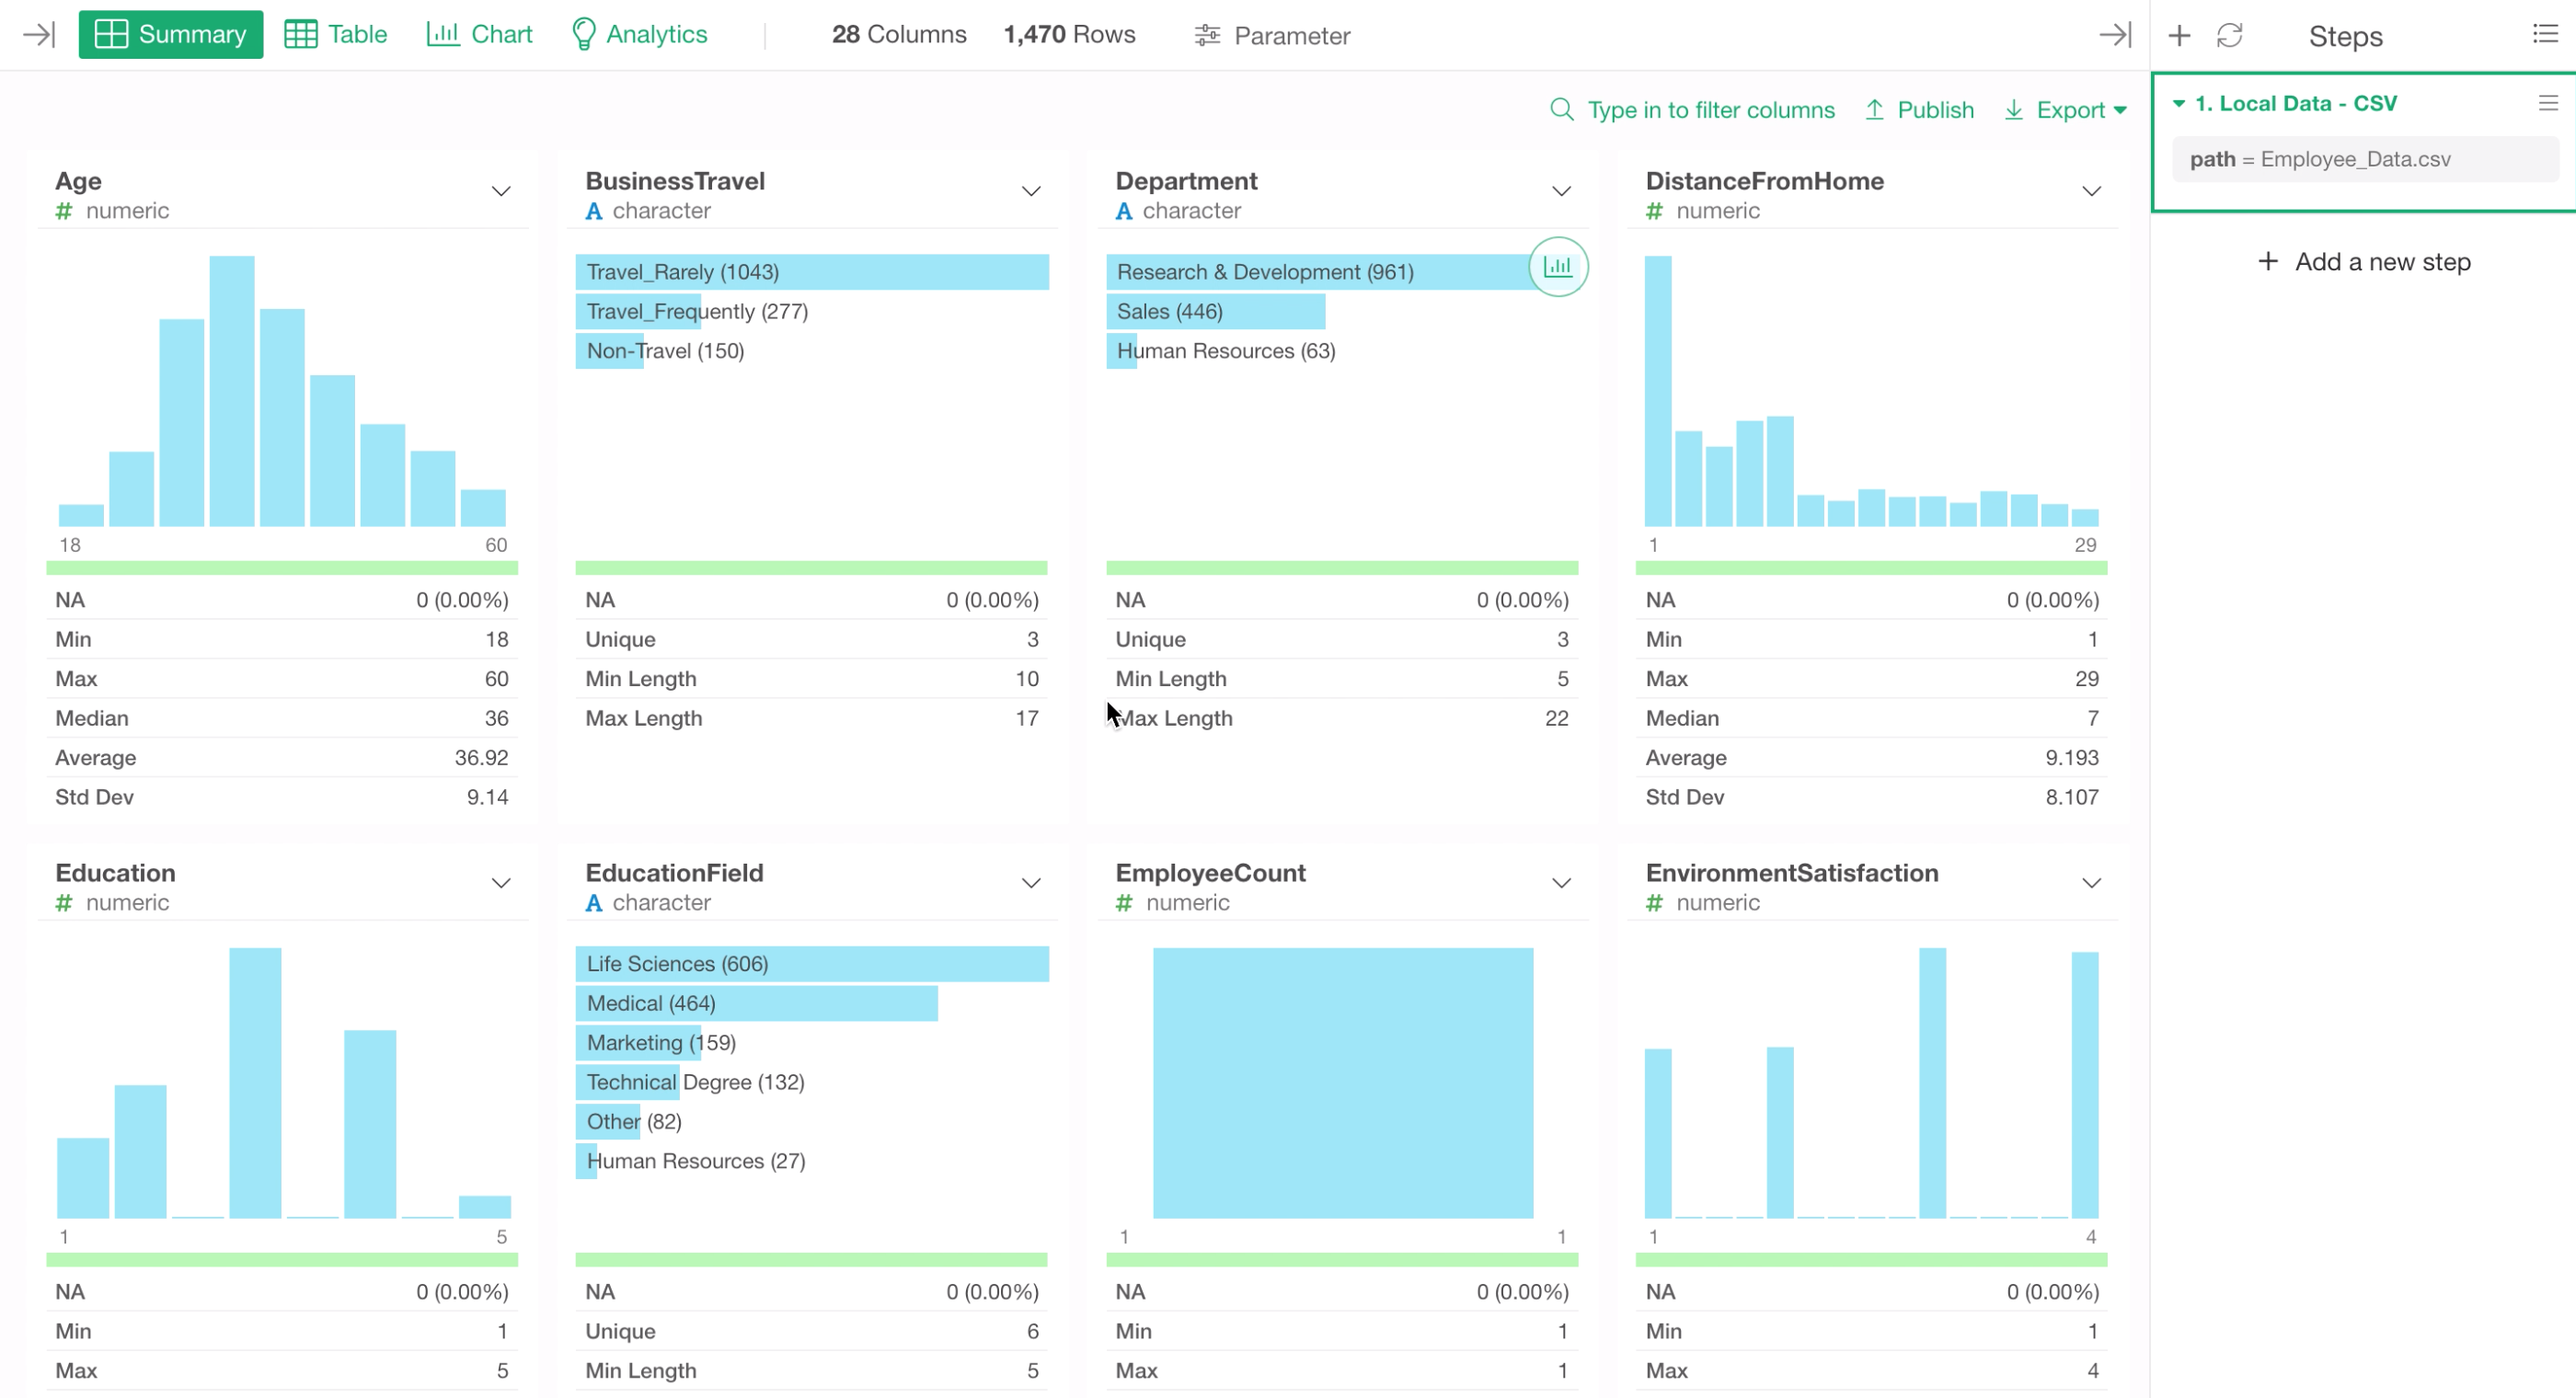

Примеры графиков, построенных с помощью Exploratory:


1.   [Старбакс в Калифорнии](https://drive.google.com/file/d/1vC124w7FfinNyMTAEguKRVBpFqfPMJG6/view?usp=sharing)
2.   [Анализ данных с Last.fm](https://drive.google.com/file/d/1pRBkrZ5kzSIkXWTWorb5PYpygIt9JN8d/view?usp=sharing)

Плюс, у ПО есть [туториал](httphttps://exploratory.io/note/kanaugust/2617200410576325s://).